# Titanic Random Forest


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
training_filename = 'train.csv'
test_filename = 'test.csv'

In [6]:
df_raw_train = pd.read_csv('train.csv')
df_raw_test = pd.read_csv('test.csv')

In [7]:
df_raw_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_raw_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df_raw_train = df_raw_train.fillna(np.nan)
df_raw_test = df_raw_test.fillna(np.nan)

In [10]:
def get_unique_titles(names):
    unique_titles = []
    for name in names:
        title = get_title_from_name(name)
        if title not in unique_titles:
            unique_titles.append(title)
    return unique_titles

def get_title_from_name(name):
    return name.split(',')[1].split('.')[0].strip()

## Convert Names to Titles

In [11]:
all_names = df_raw_train.Name.append(df_raw_test.Name)
titles = get_unique_titles(all_names)

title_mapping = {
    'Mr' : 2,
    'Mrs' : 1,
    'Miss' : 1,
    'Master' : 0,
    'Don' : 3,
    'Rev' : 3,
    'Dr' : 3,
    'Mme' : 1,
    'Ms' : 1,
    'Major' : 3,
    'Lady' : 3,
    'Sir' : 3,
    'Mlle' : 3,
    'Col' : 3,
    'Capt' : 3,
    'the Countess' : 3,
    'Jonkheer' : 3,
    'Dona' : 3
}

df_raw_train['Title'] = df_raw_train.Name.apply(get_title_from_name)
df_raw_train.Title = df_raw_train.Title.apply(lambda x: title_mapping[x])

df_raw_test['Title'] = df_raw_test.Name.apply(get_title_from_name)
df_raw_test.Title = df_raw_test.Title.apply(lambda x: title_mapping[x])


In [12]:
df_raw_train = df_raw_train.drop(["Name"], axis=1)
df_raw_test = df_raw_test.drop(["Name"], axis=1)

For each title in title mapping we want to find the mean age excluding NaNs and then replace all NaNs with that age.

In [13]:
df_raw_train.groupby(['Title','Sex']).Age.mean()

Title  Sex   
0      male       4.574167
1      female    27.765625
2      male      32.368090
3      female    35.600000
       male      45.894737
Name: Age, dtype: float64

In [14]:
df_raw_train.Age.mean()

29.69911764705882

In [15]:
def replace_null_ages_with_mean(cols):
    age = cols[0]
    title = cols[1]
    sex = cols[2]
    if pd.isnull(age):
        if title == 0:
            return 5
        elif title == 1:
            return 28
        elif title == 2:
            return 32
        elif title == 3 and sex == 'female':
            return 36 
        elif title == 3 and sex == 'male':
            return 46
        else:
            return 30
    else:
        return age

    

In [16]:
df_raw_train.Age = df_raw_train[["Age", "Title", "Sex"]].apply(replace_null_ages_with_mean, axis=1)
df_raw_test.Age = df_raw_test[["Age", "Title", "Sex"]].apply(replace_null_ages_with_mean, axis=1)

## Cabin
If there is no cabin we should mark as an 'X' but otherwise strip it to the first character

In [17]:
def replace_cabins_with_level(cabin):
    if pd.isnull(cabin):
        return 'X'
    else:
        return cabin[0]

In [18]:
df_raw_train.Cabin = df_raw_train.Cabin.apply(replace_cabins_with_level)
df_raw_test.Cabin = df_raw_test.Cabin.apply(replace_cabins_with_level)

In [19]:
# g = sns.catplot(x="Cabin", y="Survived", data=df_raw_train, kind='bar')

## Embarked
Perhaps where they got on

/Users/dominicjaques/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


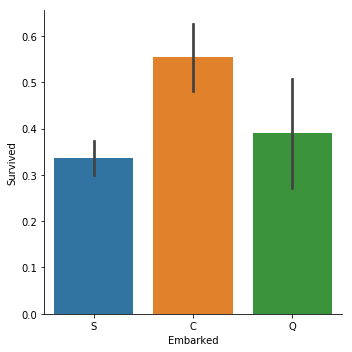

In [20]:
g = sns.catplot(x="Embarked", y="Survived", data=df_raw_train, kind='bar')

In [21]:
def replace_embarked_null(embarked):
    if pd.isnull(embarked):
        return 'X'
    else:
        return embarked

In [23]:
df_raw_train.Embarked = df_raw_train.Embarked.apply(replace_embarked_null)
df_raw_test.Embarked = df_raw_test.Embarked.apply(replace_embarked_null)

## Family

In [24]:
df_raw_train["FamilySz"] = df_raw_train.Parch + df_raw_train.SibSp
df_raw_test["FamilySz"] = df_raw_test.Parch + df_raw_test.SibSp

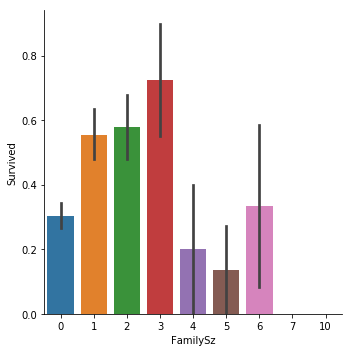

In [25]:
g = sns.catplot(x="FamilySz", y="Survived", data=df_raw_train, kind='bar')

In [26]:
def categorise_family_size(family_size):
    mapping = {
        'Single' : 0,
        'Small' : 1,
        'Large' : 2
    }
    if family_size == 0:
        return mapping['Single']
    elif family_size > 0 and family_size < 4:
        return mapping['Small']
    elif family_size >= 4:
        return mapping['Large']

In [27]:
df_raw_train.FamilySz = df_raw_train.FamilySz.apply(categorise_family_size)
df_raw_test.FamilySz = df_raw_test.FamilySz.apply(categorise_family_size)

## Reflect on changes

In [28]:
df_raw_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Title,FamilySz
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.812761,0.523008,0.381594,32.204208,1.591470,0.466891
std,257.353842,0.486592,0.836071,13.151410,1.102743,0.806057,49.693429,0.622874,0.623305
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,2.000000,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,2.000000


In [29]:
df_raw_train.drop(labels = ["PassengerId","SibSp", "Parch"], axis=1, inplace=True)
df_raw_test.drop(labels = ["PassengerId","SibSp", "Parch"], axis=1, inplace=True)

In [30]:
df_raw_train.values

array([[0, 3, 'male', ..., 'S', 2, 1],
       [1, 1, 'female', ..., 'C', 1, 1],
       [1, 3, 'female', ..., 'S', 1, 0],
       ...,
       [0, 3, 'female', ..., 'S', 1, 1],
       [1, 1, 'male', ..., 'C', 2, 0],
       [0, 3, 'male', ..., 'Q', 2, 0]], dtype=object)